# IMDB

In [366]:
#Import
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import ttest_rel


conn = sqlite3.connect('zipped_Data_copy/im.db')

In [367]:
cursor = conn.cursor()

In [368]:
# Getting the list of tables in the database
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)
tables

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers
8,bom_movie


In [369]:
#Movie 
movie = """
                      SELECT *
                      FROM sqlite_master

                     """
pd.read_sql(movie, conn)

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."
8,table,bom_movie,bom_movie,41369,"CREATE TABLE ""bom_movie"" (\n""title"" TEXT,\n ""..."


In [370]:
#Movie Basics Data Base
movie_basics = """
                      SELECT *
                      FROM movie_basics

                     """
pd.read_sql(movie_basics, conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [371]:
#Checking for Null value in movie basics data base.
movie_basics_null = """
    SELECT 
        SUM(CASE WHEN movie_id IS NULL THEN 1 ELSE 0 END) AS missing_movie_id,
        SUM(CASE WHEN primary_title IS NULL THEN 1 ELSE 0 END) AS missing_primary_title,
        SUM(CASE WHEN original_title IS NULL THEN 1 ELSE 0 END) AS missing_original_title,
        SUM(CASE WHEN start_year IS NULL THEN 1 ELSE 0 END) AS missing_start_year,
        SUM(CASE WHEN runtime_minutes IS NULL THEN 1 ELSE 0 END) AS missing_runtime_minutes,
        SUM(CASE WHEN genres IS NULL THEN 1 ELSE 0 END) AS missing_genres
    FROM movie_basics;
"""

pd.read_sql(movie_basics_null, conn)

,missing_movie_id,missing_primary_title,missing_original_title,missing_start_year,missing_runtime_minutes,missing_genres
0,0,0,21,0,31739,5408


In [372]:
#Movie Rating Data Base
movie_ratings = """
                      SELECT *
                      FROM movie_ratings

                     """
pd.read_sql(movie_ratings, conn)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [373]:
# Checking for Null value in ovie Rating Data Base
movie_ratings_null = """
    SELECT 
        SUM(CASE WHEN movie_id IS NULL THEN 1 ELSE 0 END) AS missing_movie_id,
        SUM(CASE WHEN averagerating IS NULL THEN 1 ELSE 0 END) AS missing_averagerating,
        SUM(CASE WHEN numvotes IS NULL THEN 1 ELSE 0 END) AS missing_numvotes
    FROM movie_ratings;
"""

pd.read_sql(movie_ratings_null, conn)

,missing_movie_id,missing_averagerating,missing_numvotes
0,0,0,0


In [431]:
#Persons
persons_db = """
                      SELECT *
                      FROM persons

                     """
pd.read_sql(persons_db, conn)

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"
...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress
606644,nm9990690,Joo Yeon So,NaN,NaN,actress
606645,nm9991320,Madeline Smith,NaN,NaN,actress
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer


In [432]:
#Principals
principals_db = """
                      SELECT *
                      FROM principals

                     """
pd.read_sql(principals_db, conn)

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"
...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,None,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,None,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,None,None
1028184,tt9692684,4,nm6009913,writer,writer,None


In [440]:
#Directors
directors = """
                      SELECT *
                      FROM principals
                      WHERE category = 'director'

                     """
directors = pd.read_sql(directors, conn)
directors

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,2,nm0398271,director,None,None
1,tt0323808,5,nm0362736,director,None,None
2,tt0417610,5,nm1145057,director,None,None
3,tt0469152,5,nm0707738,director,None,None
4,tt0473032,3,nm0776090,director,None,None
...,...,...,...,...,...,...
146388,tt9679036,5,nm9728620,director,None,None
146389,tt9681728,5,nm10436661,director,None,None
146390,tt9689618,4,nm9652770,director,None,None
146391,tt9689618,5,nm10439725,director,None,None


In [437]:
#Actors
actors = """
                      SELECT *
                      FROM principals
                      WHERE category = 'actor'

                     """
pd.read_sql(actors, conn)

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0323808,2,nm2694680,actor,None,"[""Steve Thomson""]"
2,tt0323808,3,nm0574615,actor,None,"[""Sir Lachlan Morrison""]"
3,tt0417610,1,nm0532721,actor,None,"[""Lucio""]"
4,tt0417610,3,nm0069209,actor,None,"[""Dr. Samaniego""]"
...,...,...,...,...,...,...
256713,tt9681728,9,nm10397910,actor,None,"[""Corpsman""]"
256714,tt9689618,1,nm10439726,actor,None,None
256715,tt9689618,2,nm10439727,actor,None,None
256716,tt9689618,3,nm10439724,actor,None,None


# Bom Movie

In [374]:
#Uploading BOM CSV file into pandas DataFrame
bom_movie = pd.read_csv('zipped_Data_copy/bom.movie_gross.csv')
bom_movie

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


### Cleaning BOM Movie 

In [375]:
# Drop rows with NaN values in any column in BOM
bom_movie = bom_movie.dropna(axis=0)

In [393]:
# Converting the 'domestic_gross' column to integers without rounding
bom_movie['domestic_gross'] = bom_movie['domestic_gross'].astype(int)
bom_movie

<ipython-input-393-34b58853f677>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bom_movie['domestic_gross'] = bom_movie['domestic_gross'].astype(int)


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000,652000000,2010
1,Alice in Wonderland (2010),BV,334200000,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000,664300000,2010
3,Inception,WB,292600000,535700000,2010
4,Shrek Forever After,P/DW,238700000,513900000,2010
...,...,...,...,...,...
3275,I Still See You,LGF,1400,1500000,2018
3286,The Catcher Was a Spy,IFC,725000,229000,2018
3309,Time Freak,Grindstone,10000,256000,2018
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200,5200,2018


# The Numbers Movie Budget

In [377]:
# TNMB CSV file into a pandas DataFrame
tn_movie_budgets = pd.read_csv('zipped_Data_copy/tn.movie_budgets.csv')
tn_movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


### Cleaning The Numbers Movie Budget

In [378]:
# Removing'$' from 'production_budget', 'domestic_gross', and 'worldwide_gross'.
tn_movie_budgets['production_budget'] = tn_movie_budgets['production_budget'].str.replace('$', '')
tn_movie_budgets['domestic_gross'] = tn_movie_budgets['domestic_gross'].str.replace('$', '')
tn_movie_budgets['worldwide_gross'] = tn_movie_budgets['worldwide_gross'].str.replace('$', '')

In [379]:
# Removing commas from 'production_budget', 'domestic_gross', and 'worldwide_gross'
tn_movie_budgets['production_budget'] = tn_movie_budgets['production_budget'].str.replace(',', '')
tn_movie_budgets['domestic_gross'] = tn_movie_budgets['domestic_gross'].str.replace(',', '')
tn_movie_budgets['worldwide_gross'] = tn_movie_budgets['worldwide_gross'].str.replace(',', '')

In [380]:
tn_movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0
5778,79,"Apr 2, 1999",Following,6000,48482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0


In [381]:
# Checking for missing values in the TNMB 
tn_movie_budgets_null = tn_movie_budgets.isnull().sum()
tn_movie_budgets_null

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [382]:
# Checking how many rows have 0 as value in 'production_budget', 'domestic_gross', and 'worldwide_gross' columns
num_zero_production_budget = (tn_movie_budgets['production_budget'] == '0').sum()
num_zero_domestic_gross = (tn_movie_budgets['domestic_gross'] == '0').sum()
num_zero_worldwide_gross = (tn_movie_budgets['worldwide_gross'] == '0').sum()

print(f"Number of rows with 0 in 'production_budget': {num_zero_production_budget}")
print(f"Number of rows with 0 in 'domestic_gross': {num_zero_domestic_gross}")
print(f"Number of rows with 0 in 'worldwide_gross': {num_zero_worldwide_gross}")

Number of rows with 0 in 'production_budget': 0
Number of rows with 0 in 'domestic_gross': 548
Number of rows with 0 in 'worldwide_gross': 367


In [383]:
# Removing rows where the value is zero in 'domestic_gross' and 'worldwide_gross' columns and reseting the index
tn_movie_budgets = tn_movie_budgets.loc[(tn_movie_budgets['domestic_gross'] != '0') & (tn_movie_budgets['worldwide_gross'] != '0')]

tn_movie_budgets.reset_index(drop=True, inplace=True)
tn_movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5229,76,"May 26, 2006",Cavite,7000,70071,71644
5230,77,"Dec 31, 2004",The Mongol King,7000,900,900
5231,79,"Apr 2, 1999",Following,6000,48482,240495
5232,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338


# Creating The Master DF

In [384]:
#SQL to pandas data frame
df_movie_basics = pd.read_sql_query(movie_basics, conn)
df_movie_ratings = pd.read_sql_query(movie_ratings, conn)

In [385]:
# Merging df_movie_basics with df_movie_ratings based on 'movie_id'
merged_df1 = pd.merge(df_movie_basics, df_movie_ratings, on='movie_id', how='inner')

# Merging merged_df1 with bom_movie based on 'title'
merged_df2 = pd.merge(merged_df1, bom_movie, left_on='primary_title', right_on='title', how='inner')

# Merging merged_df2 with tn_movie_budgets based on 'movie'
master_df = pd.merge(merged_df2, tn_movie_budgets, left_on='primary_title', right_on='movie', how='inner')

# Dropping unnecessary columns (original_title, title and movie)
master_df.drop(['original_title', 'title', 'movie'], axis=1, inplace=True)
master_df

,movie_id,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross_x,foreign_gross,year,id,release_date,production_budget,domestic_gross_y,worldwide_gross
0,tt0337692,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,IFC,744000,8000000,2012,17,"Mar 22, 2013",25000000,720828,9313302
1,tt4339118,On the Road,2014,89.0,Drama,6.0,6,IFC,744000,8000000,2012,17,"Mar 22, 2013",25000000,720828,9313302
2,tt5647250,On the Road,2016,121.0,Drama,5.7,127,IFC,744000,8000000,2012,17,"Mar 22, 2013",25000000,720828,9313302
3,tt0359950,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,Fox,58200000,129900000,2013,37,"Dec 25, 2013",91000000,58236838,187861183
4,tt0365907,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,Uni.,26300000,26900000,2014,67,"Sep 19, 2014",28000000,26017685,62108587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204,tt7334528,Uncle Drew,2018,103.0,"Comedy,Sport",5.7,9739,LG/S,42500000,4200000,2018,85,"Jun 29, 2018",18000000,42469946,46527161
1205,tt7349662,BlacKkKlansman,2018,135.0,"Biography,Crime,Drama",7.5,149005,Focus,49300000,44000000,2018,21,"Aug 10, 2018",15000000,49275340,93017335
1206,tt7388562,"Paul, Apostle of Christ",2018,108.0,"Adventure,Biography,Drama",6.7,5662,Affirm,17600000,5500000,2018,95,"Mar 23, 2018",5000000,17547999,25529498
1207,tt7401588,Instant Family,2018,118.0,"Comedy,Drama",7.4,46728,Par.,67400000,53200000,2018,20,"Nov 16, 2018",48000000,67363237,119736188


### Average World Wide Gross By Genre

In [399]:
# Cleaning and converting the 'worldwide_gross' column to numeric
def clean_worldwide_gross(gross):
    if isinstance(gross, str):
        # Removing commas and other non-numeric characters
        return pd.to_numeric(gross.replace('[\$,£€]', ''))
    return gross

# Cleaning and convert 'worldwide_gross' column to numeric
tn_movie_budgets.loc[:, 'worldwide_gross'] = tn_movie_budgets['worldwide_gross'].apply(clean_worldwide_gross)

# Removing rows with missing values (NaN) in the 'worldwide_gross' column
tn_movie_budgets = tn_movie_budgets.dropna(subset=['worldwide_gross'])

# Calculating the average worldwide gross by movie from tn_movie_budgets
average_worldwide_gross_by_movie = tn_movie_budgets.groupby('movie')['worldwide_gross'].mean().reset_index()

# Retrieving the 'genres' column from the movie_basics SQL table
query = "SELECT primary_title, genres FROM movie_basics"
movie_basics = pd.read_sql_query(query, conn)

# Merging the average worldwide gross by movie with movie_basics on 'primary_title'
merged_df = movie_basics.merge(average_worldwide_gross_by_movie, left_on='primary_title', right_on='movie', how='inner')

# Calculating the average worldwide gross by genre
average_worldwide_gross_by_genre = merged_df.groupby('genres')['worldwide_gross'].mean().sort_values(ascending=False)


In [411]:
# Selecting the top 10 genres
top_10_worldwide_gross_by_genres = average_worldwide_gross_by_genre.head(10)
top_10_worldwide_gross_by_genres

genres
Fantasy,Romance               1.272470e+09
Adventure,Drama,Sport         1.272470e+09
Fantasy,Musical               1.025491e+09
Family,Fantasy,Musical        9.338154e+08
Adventure,Fantasy             7.012107e+08
Action,Adventure,Sci-Fi       6.206251e+08
Adventure,Animation,Drama     5.121452e+08
Documentary,Thriller          4.576838e+08
Adventure,Drama,Sci-Fi        4.496994e+08
Action,Adventure,Animation    4.374047e+08
Name: worldwide_gross, dtype: float64

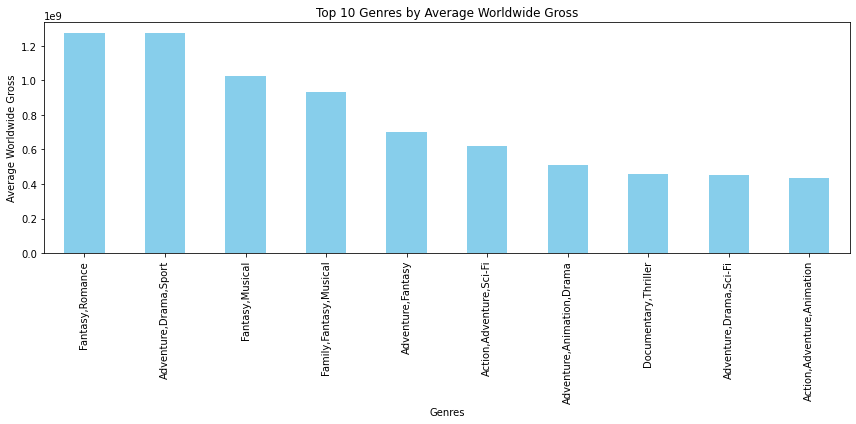

In [400]:
# Creating the bar chart for the top 10 genres
plt.figure(figsize=(12, 6))
top_10_genres.plot.bar(color='skyblue')
plt.xlabel('Genres')
plt.ylabel('Average Worldwide Gross')
plt.title('Top 10 Genres by Average Worldwide Gross')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


### Average Rating By Genre

In [409]:
# Calculating the top 10 average Rating by genre
averagerating_by_genre = '''
SELECT mb.genres, AVG(mr.averagerating) AS average_rating
FROM movie_basics AS mb
JOIN movie_ratings AS mr ON mb.movie_id = mr.movie_id
GROUP BY mb.genres
ORDER BY average_rating DESC
LIMIT 10
'''
averagerating_by_genre = pd.read_sql(averagerating_by_genre, conn)
averagerating_by_genre

,genres,average_rating
0,"Comedy,Documentary,Fantasy",9.4
1,"Documentary,Family,Musical",9.3
2,"History,Sport",9.2
3,"Music,Mystery",9.0
4,Game-Show,9.0
5,"Drama,Short",8.8
6,"Drama,Fantasy,War",8.8
7,"Documentary,News,Sport",8.8
8,"Documentary,News,Reality-TV",8.8
9,"Comedy,Drama,Reality-TV",8.8


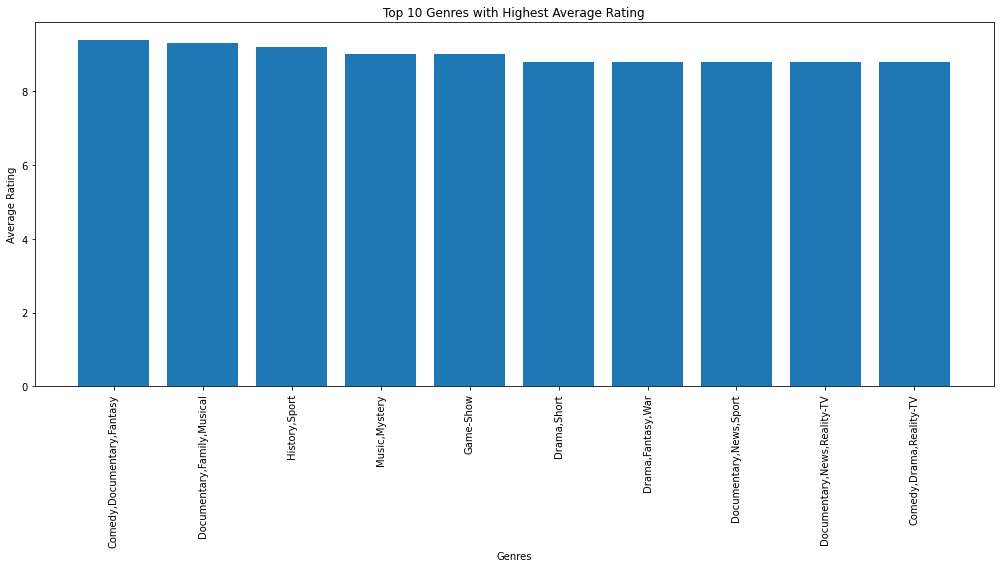

In [389]:
# Plotting the bar chart for the top 10 genres with the highest average ratings
average_rating_df = pd.read_sql(averagerating_by_genre, conn)
plt.figure(figsize=(14, 8))
plt.bar(average_rating_df['genres'], average_rating_df['average_rating'])
plt.xlabel('Genres')
plt.ylabel('Average Rating')
plt.title('Top 10 Genres with Highest Average Rating')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Hypothesis Testing
Analysis of the Relationship between Production Budget and Worldwide Gross in Movies

**Null Hypothesis (H0):**
There is no significant linear relationship between the production budget and worldwide gross of movies. 

**Alternative Hypothesis (Ha):**
There is a significant linear relationship between the production budget and worldwide gross of movies.


### Test Type
A **Paired T-test** is appropriate beacause we have two measurements for each observation, the production budget and worldwide gross of each movie.

In [426]:
# Converting 'production_budget' and 'worldwide_gross' columns to numeric
tn_movie_budgets['production_budget'] = pd.to_numeric(tn_movie_budgets['production_budget'], errors='coerce')
tn_movie_budgets['worldwide_gross'] = pd.to_numeric(tn_movie_budgets['worldwide_gross'], errors='coerce')

# Dropping rows with missing values in either column 
tn_movie_budgets.dropna(subset=['production_budget', 'worldwide_gross'], inplace=True)

# Performing the paired t-test
t_statistic, p_value = ttest_rel(tn_movie_budgets['production_budget'], tn_movie_budgets['worldwide_gross'])
print("Paired t-test results:")
print("t-stat:", t_statistic)
print("p-value:", p_value)

Paired t-test results:
t-stat: -31.790984325516696
p-value: 6.037075234662483e-203


The negative t-stat suggests that the mean of the worldwide gross is significantly lower than the mean of the production budget. The large absolute value of the t-stat indicates a substantial difference between the means of the two variables.

The very small, close to zero p-value indicates strong evidence against the null hypothesis (H0). Therefore, we are rejecting the null hypothesis and conclude that there is a statistically significant difference between the means of the production budget and worldwide gross in our sample.

### Linear Regression Analysis Between Budget and Gross.

Slope: 3.140414642708169
Intercept: -6117732.934767932
R-squared: 0.5548387133782499


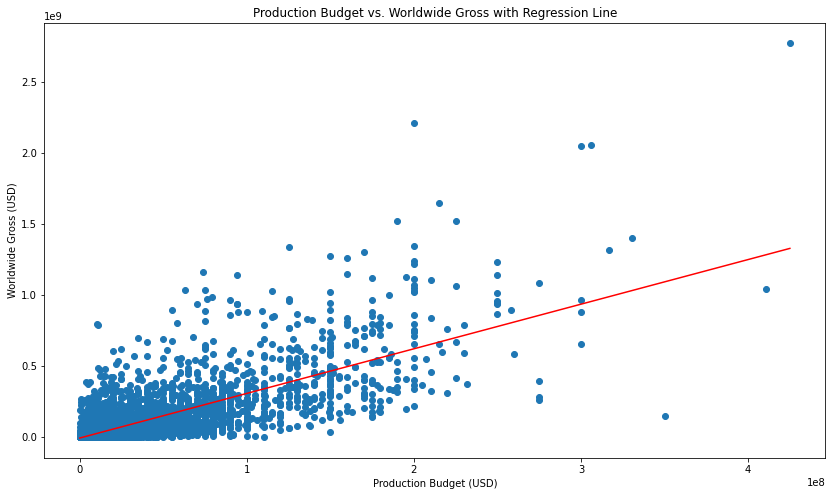

In [427]:
# Convert the 'production_budget' and 'worldwide_gross' columns to numeric
tn_movie_budgets['production_budget'] = pd.to_numeric(tn_movie_budgets['production_budget'], errors='coerce')
tn_movie_budgets['worldwide_gross'] = pd.to_numeric(tn_movie_budgets['worldwide_gross'], errors='coerce')

# Drop rows with missing values in either column
tn_movie_budgets.dropna(subset=['production_budget', 'worldwide_gross'], inplace=True)

# Calculate regression coefficients
slope, intercept, r_value, p_value, std_err = stats.linregress(tn_movie_budgets['production_budget'], tn_movie_budgets['worldwide_gross'])

plt.figure(figsize=(14, 8))

# Print regression coefficients
print("Slope:", slope)
print("Intercept:", intercept)
print("R-squared:", r_value**2)

# Plot the regression line
plt.scatter(tn_movie_budgets['production_budget'], tn_movie_budgets['worldwide_gross'])
plt.plot(tn_movie_budgets['production_budget'], slope * tn_movie_budgets['production_budget'] + intercept, color='red')
plt.xlabel('Production Budget (USD)')
plt.ylabel('Worldwide Gross (USD)')
plt.title('Production Budget vs. Worldwide Gross with Regression Line')
plt.show()

The positive slope of 3.14 indicates that there is a positive relationship between the production budget and worldwide gross. On average, as the production budget increases, the worldwide gross revenue of the movies tends to increase as well. However, the R-squared value of 0.55 suggests that the linear regression model explains only 55% of the variability in the worldwide gross revenue. There are other factors or variables that also contribute to the worldwide gross but are not accounted for in this simple linear regression model. Therefore, while the model shows a positive relationship, it might not capture all the complexities of the relationship between production budget and worldwide gross.




